
# Classificando Flores de Iris
Exemplo retirado do livro Python Machine Learn, de Sebastian Raschka

## Processo
<img src="fig9.png">
## O problema a ser resolvido
<img src="fig10.png">

## Usando o algoritmo Perceptron para classificar flores de Iris
### Algoritmo baseado no Neurônio
<img src="fig11.jpg">
### Conceito Geral do Perceptron
<img src="fig12.jpg">

## Pré-Processamento

In [1]:
import pandas as pd
floresIris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
floresIris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


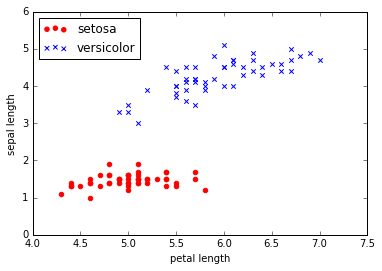

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

rotulos = floresIris.iloc[0:100, 4].values
rotulos = np.where(rotulos == 'Iris-setosa', -1, 1)

caracteristicas = floresIris.iloc[0:100, [0,2]].values

plt.scatter(caracteristicas[:50, 0], caracteristicas[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(caracteristicas[50:, 0], caracteristicas[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [4]:
from sklearn.cross_validation import train_test_split
caracteristicas_treinamento, caracteristicas_teste, rotulos_treinamento, rotulos_teste = \
    train_test_split(caracteristicas, rotulos, test_size=0.3, random_state=1)

## Aprendizado

In [5]:
from sklearn.linear_model import Perceptron
p = Perceptron(n_iter=10000, eta0=0.5, random_state=0)
p.fit(caracteristicas_treinamento, rotulos_treinamento)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.5, fit_intercept=True,
      n_iter=10000, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

## Avaliação

In [7]:
rotulos_preditos = p.predict(caracteristicas_teste)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(rotulos_teste, rotulos_preditos))

Accuracy: 1.00


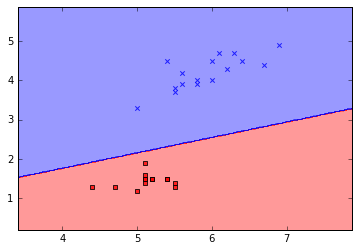

In [8]:
plot_decision_regions(caracteristicas_teste, rotulos_preditos, p)